In [1]:
import os

import cv2
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize
from tqdm import tqdm

In [2]:
plt.rcParams['figure.figsize'] = [6.43,4.83]
plt.rcParams['figure.dpi'] = 106

In [3]:
raw_seg_black = cv2.imread('../../irop_data/segmentations/9510.bmp')
raw_seg_white = cv2.imread('../../irop_data/segmentations/66884.bmp')

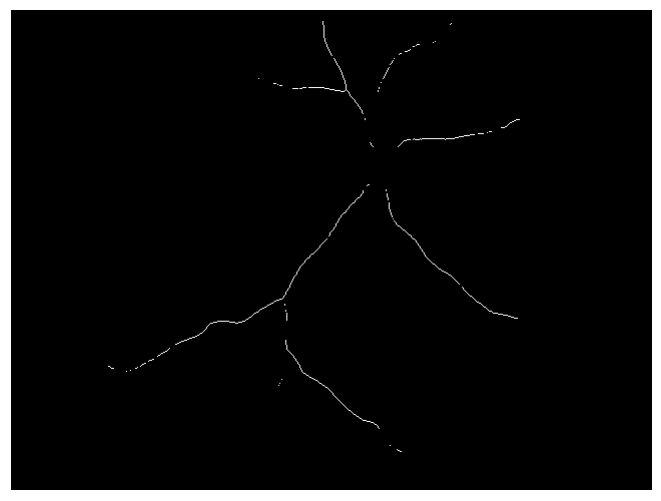

In [4]:
for lower_threshold in [0, 50, 220]:
    black_threshold = np.copy(raw_seg_black)[:,:,0]
    white_threshold = np.copy(raw_seg_white)[:,:,0]
    black_threshold[black_threshold < lower_threshold] = 0
    white_threshold[white_threshold < lower_threshold] = 0

    black_binary = np.copy(black_threshold)
    white_binary = np.copy(white_threshold)
    black_binary[black_binary > 0] = 255
    white_binary[white_binary > 0] = 255

    black_skeleton = np.copy(black_binary)
    white_skeleton = np.copy(white_binary)
    black_skeleton = skeletonize(black_skeleton, method='lee')
    white_skeleton = skeletonize(white_skeleton, method='lee')

    images = [black_threshold, white_threshold, black_binary, white_binary, black_skeleton, white_skeleton]
    image_names = ['black_threshold', 'white_threshold', 'black_binary', 'white_binary', 'black_skeleton', 'white_skeleton']
    for img, img_name in zip(images, image_names):
        plt.axis('off')
        plt.tight_layout()
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.savefig(f'./out/figures/{img_name}_{lower_threshold}.png', bbox_inches='tight', pad_inches=0)

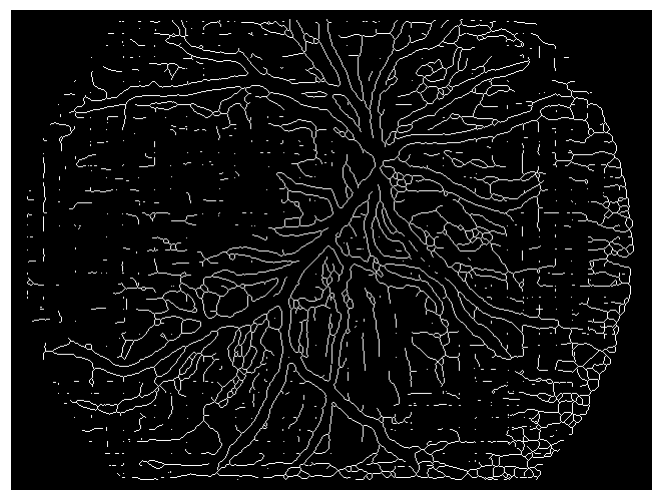

In [5]:
lower_threshold = 10

black_threshold = np.copy(raw_seg_black)[:,:,0]
white_threshold = np.copy(raw_seg_white)[:,:,0]
black_threshold[black_threshold > lower_threshold] = 0
white_threshold[white_threshold > lower_threshold] = 0

black_binary = np.copy(black_threshold)
white_binary = np.copy(white_threshold)
black_binary[black_binary > 0] = 255
white_binary[white_binary > 0] = 255

black_skeleton = np.copy(black_binary)
white_skeleton = np.copy(white_binary)
black_skeleton = skeletonize(black_skeleton, method='lee')
white_skeleton = skeletonize(white_skeleton, method='lee')

images = [black_threshold, white_threshold, black_binary, white_binary, black_skeleton, white_skeleton]
image_names = ['black_threshold', 'white_threshold', 'black_binary', 'white_binary', 'black_skeleton', 'white_skeleton']
for img, img_name in zip(images, image_names):
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.savefig(f'./out/figures/{img_name}_{lower_threshold}.png', bbox_inches='tight', pad_inches=0)

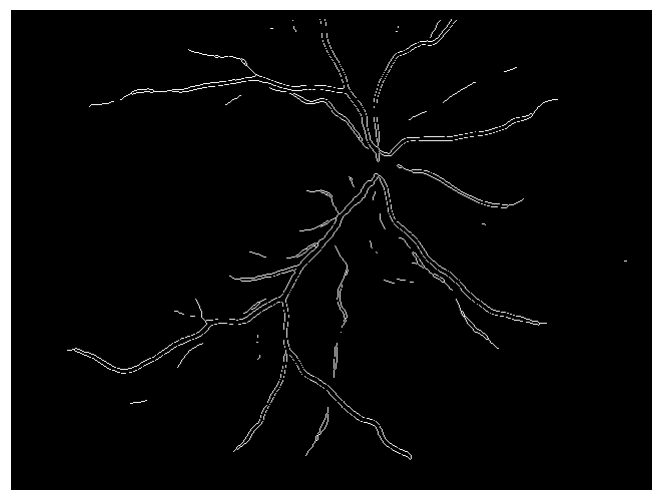

In [6]:
lower_threshold = 75
upper_threshold = 150

black_threshold = np.copy(raw_seg_black)[:,:,0]
white_threshold = np.copy(raw_seg_white)[:,:,0]
black_threshold[black_threshold < lower_threshold] = 0
white_threshold[white_threshold < lower_threshold] = 0
black_threshold[black_threshold > upper_threshold] = 0
white_threshold[white_threshold > upper_threshold] = 0

black_binary = np.copy(black_threshold)
white_binary = np.copy(white_threshold)
black_binary[black_binary > 0] = 255
white_binary[white_binary > 0] = 255

black_skeleton = np.copy(black_binary)
white_skeleton = np.copy(white_binary)
black_skeleton = skeletonize(black_skeleton, method='lee')
white_skeleton = skeletonize(white_skeleton, method='lee')

images = [black_threshold, white_threshold, black_binary, white_binary, black_skeleton, white_skeleton]
image_names = ['black_threshold', 'white_threshold', 'black_binary', 'white_binary', 'black_skeleton', 'white_skeleton']
for img, img_name in zip(images, image_names):
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.savefig(f'./out/figures/{img_name}_{lower_threshold}.png', bbox_inches='tight', pad_inches=0)

In [7]:
def average_hist(directory):
    red_hists = []
    green_hists = []
    blue_hists = []
    for img in tqdm(os.listdir(directory)):
        img = cv2.imread(os.path.join(directory, img))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        red_hist = cv2.calcHist([img], [0], None, [256], [0,256])
        green_hist = cv2.calcHist([img], [1], None, [256], [0,256])
        blue_hist = cv2.calcHist([img], [2], None, [256], [0,256])
        red_hists.append(red_hist)
        green_hists.append(green_hist)
        blue_hists.append(blue_hist)
        
    return red_hists, green_hists, blue_hists

In [8]:
black_red, black_green, black_blue = average_hist('./out/datasets/retcam/train/black')
white_red, white_green, white_blue = average_hist('./out/datasets/retcam/train/white')

100%|██████████| 1221/1221 [00:12<00:00, 95.62it/s] 


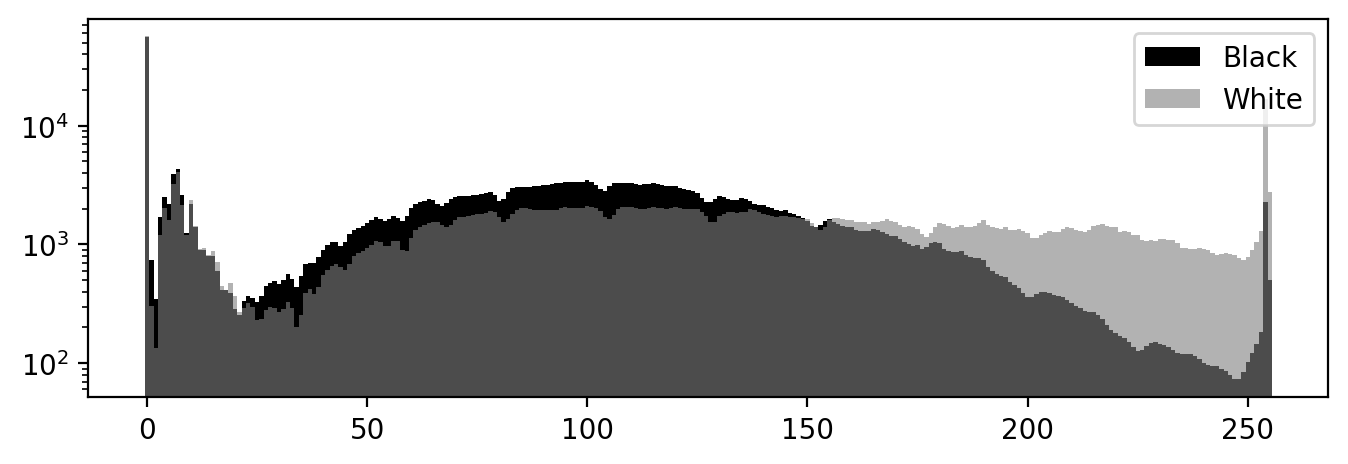

In [9]:
plt.figure(figsize=(8,2.5), dpi=200)

mean_hist = np.mean(black_red, axis=0)
mean_hist = [x[0] for x in mean_hist.tolist()]
plt.bar(np.arange(len(mean_hist)), mean_hist, log=True, alpha=1.0, label='Black', color='black', width=1.0)

mean_hist = np.mean(white_red, axis=0)
mean_hist = [x[0] for x in mean_hist.tolist()]
plt.bar(np.arange(len(mean_hist)), mean_hist, log=True, alpha=0.6, label='White', color='gray', width=1.0)

plt.legend(loc='upper right')

<BarContainer object of 256 artists>

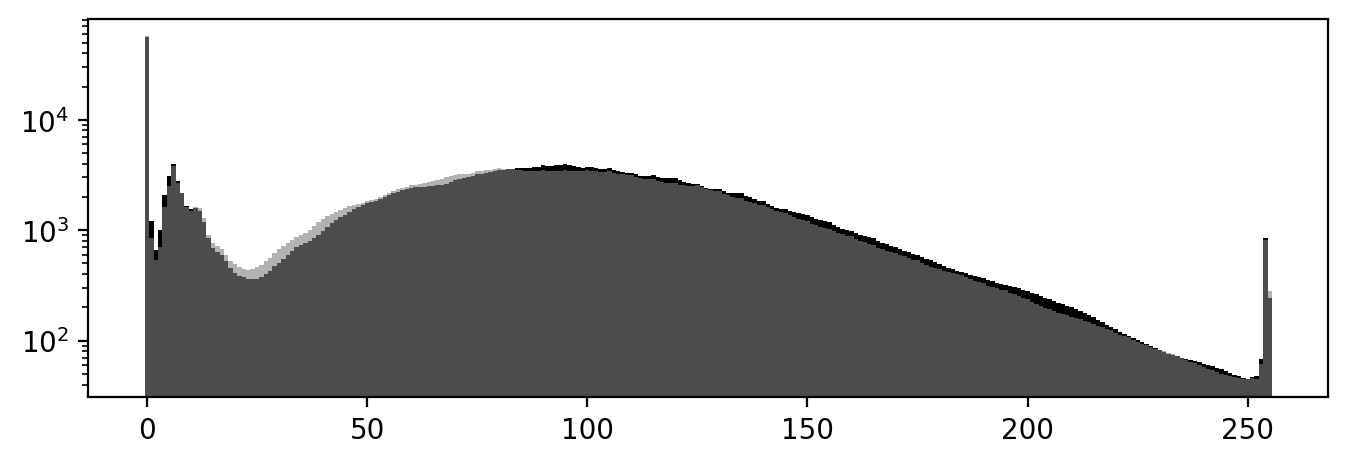

In [10]:
plt.figure(figsize=(8,2.5), dpi=200)

mean_hist = np.mean(black_green, axis=0)
mean_hist = [x[0] for x in mean_hist.tolist()]
plt.bar(np.arange(len(mean_hist)), mean_hist, log=True, alpha=1.0, label='Black', color='black', width=1.0)

mean_hist = np.mean(white_green, axis=0)
mean_hist = [x[0] for x in mean_hist.tolist()]
plt.bar(np.arange(len(mean_hist)), mean_hist, log=True, alpha=0.6, label='White', color='gray', width=1.0)

<BarContainer object of 256 artists>

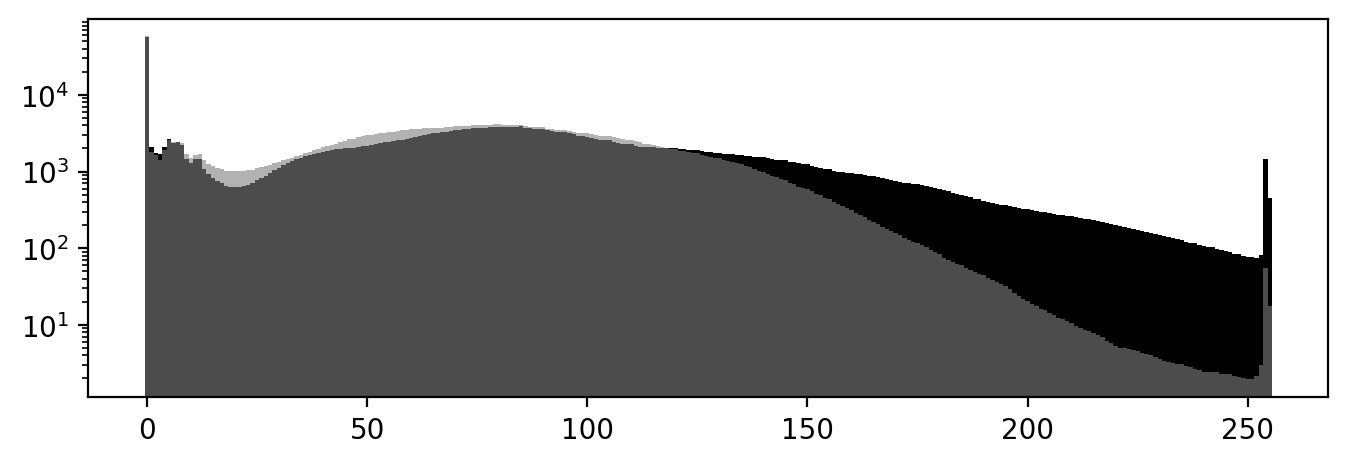

In [11]:
plt.figure(figsize=(8,2.5), dpi=200)

mean_hist = np.mean(black_blue, axis=0)
mean_hist = [x[0] for x in mean_hist.tolist()]
plt.bar(np.arange(len(mean_hist)), mean_hist, log=True, alpha=1.0, label='Black', color='black', width=1.0)

mean_hist = np.mean(white_blue, axis=0)
mean_hist = [x[0] for x in mean_hist.tolist()]
plt.bar(np.arange(len(mean_hist)), mean_hist, log=True, alpha=0.6, label='White', color='gray', width=1.0)

In [12]:
def pixels_segmented(directory, threshold):
    thresholded = []
    skeletonized = []
    for img in tqdm(os.listdir(directory)):
        img = cv2.imread(os.path.join(directory, img))
        img = img[:,:,0]
        img[img < threshold] = 0
        thresholded.append(np.count_nonzero(img))
        img[img > 0] = 1
        img = skeletonize(img, method='lee')
        skeletonized.append(np.count_nonzero(img))
    
    return thresholded, skeletonized

In [13]:
black_thresholded, black_skeletonized = pixels_segmented('./out/datasets/segmentations/train/black', 0)
white_thresholded, white_skeletonized = pixels_segmented('./out/datasets/segmentations/train/white', 0)

black_weights = np.ones(len(black_thresholded)) / len(black_thresholded)
white_weights = np.ones(len(white_thresholded)) / len(white_thresholded)

100%|██████████| 1221/1221 [00:53<00:00, 22.70it/s]


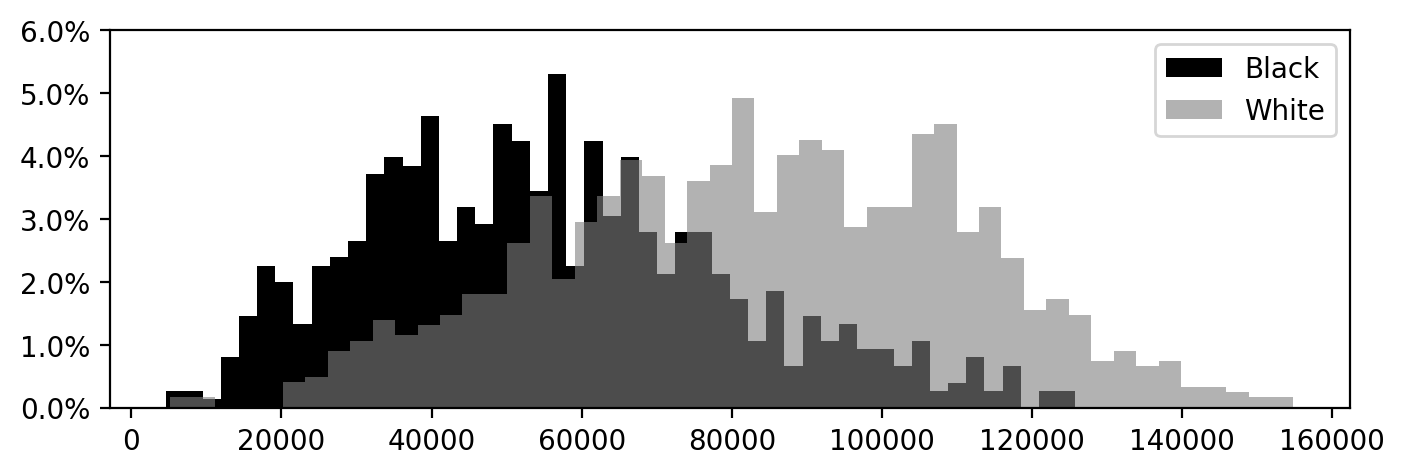

In [14]:
plt.figure(figsize=(8,2.5), dpi=200)
plt.hist(black_thresholded, weights=black_weights, alpha=1.0, bins=50, label='Black', color='black')
plt.hist(white_thresholded, weights=white_weights, alpha=0.6, bins=50, label='White', color='gray')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().set_ylim([0,0.06])
plt.legend()

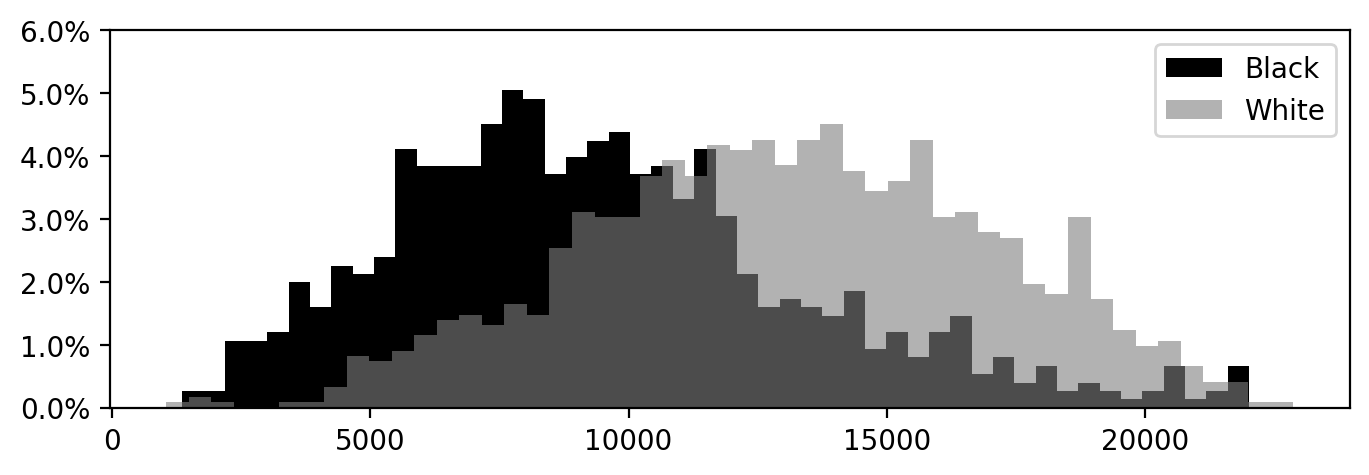

In [15]:
plt.figure(figsize=(8,2.5), dpi=200)
plt.hist(black_skeletonized, weights=black_weights, alpha=1.0, bins=50, label='Black', color='black')
plt.hist(white_skeletonized, weights=white_weights, alpha=0.6, bins=50, label='White', color='gray')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().set_ylim([0,0.06])
plt.legend()

In [16]:
black_thresholded, black_skeletonized = pixels_segmented('./out/datasets/segmentations/train/black', 100)
white_thresholded, white_skeletonized = pixels_segmented('./out/datasets/segmentations/train/white', 100)

black_weights = np.ones(len(black_thresholded)) / len(black_thresholded)
white_weights = np.ones(len(white_thresholded)) / len(white_thresholded)

100%|██████████| 1221/1221 [00:12<00:00, 98.94it/s] 


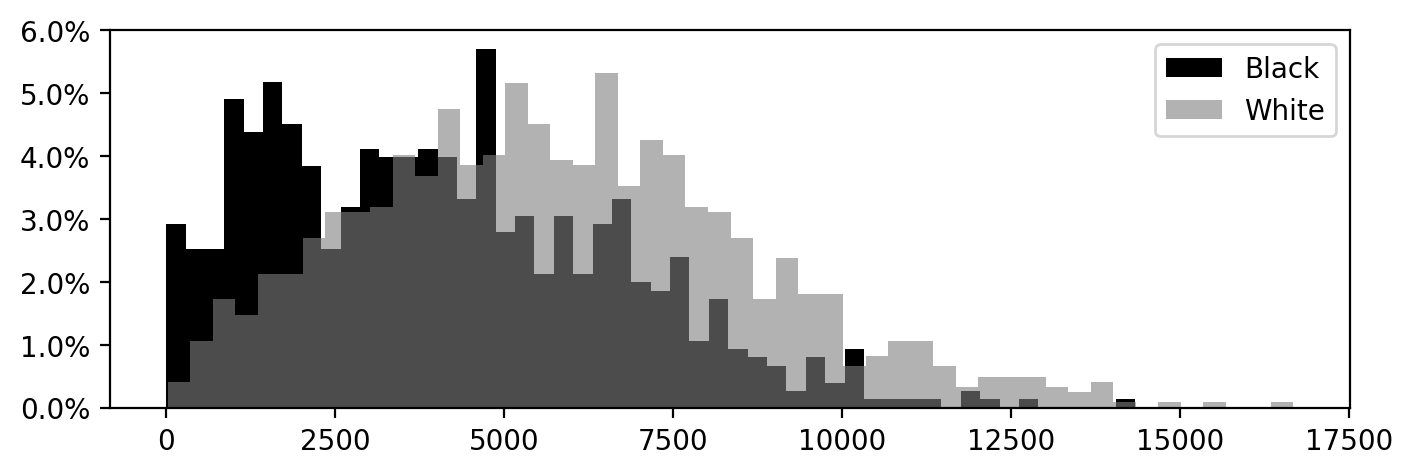

In [17]:
plt.figure(figsize=(8,2.5), dpi=200)
plt.hist(black_thresholded, weights=black_weights, alpha=1.0, bins=50, label='Black', color='black')
plt.hist(white_thresholded, weights=white_weights, alpha=0.6, bins=50, label='White', color='gray')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().set_ylim([0,0.06])
plt.legend()

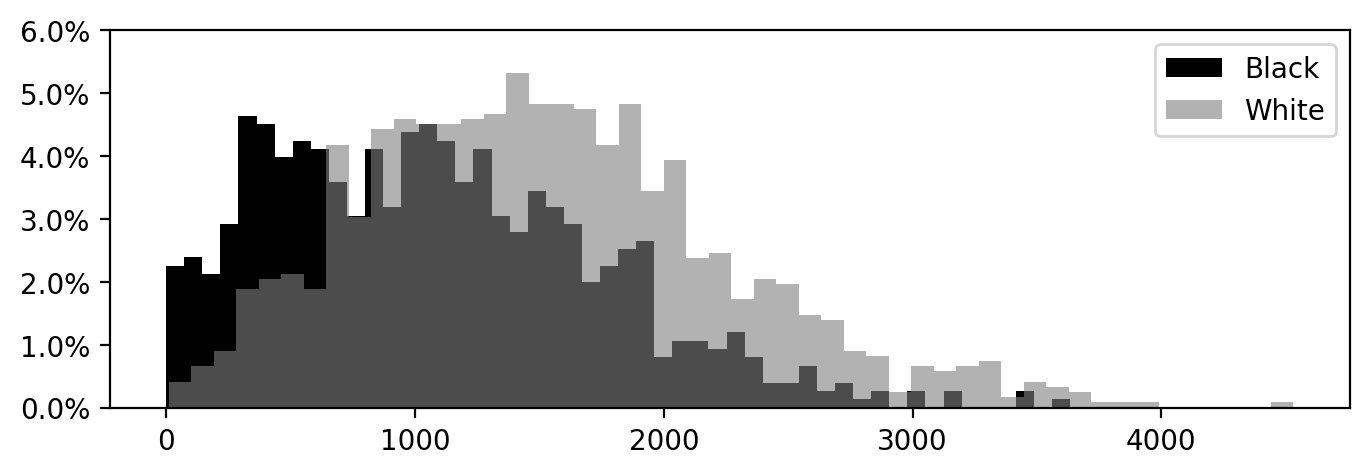

In [18]:
plt.figure(figsize=(8,2.5), dpi=200)
plt.hist(black_skeletonized, weights=black_weights, alpha=1.0, bins=50, label='Black', color='black')
plt.hist(white_skeletonized, weights=white_weights, alpha=0.6, bins=50, label='White', color='gray')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().set_ylim([0,0.06])
plt.legend()